In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt



In [73]:
#pip install scikit-learn

### Load the dataframe

In [34]:
df = pd.read_csv('placement.csv')

# Predicting Student Placements

<span style="color: green; font-size: 18px;">Data Preprocessing</span>


In [42]:
df = df.loc[:, ~df.columns.str.contains('Unnamed', case=False)]
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


<span style="color: purple; font-size: 18px;">Shape & Size</span>


In [23]:
df.shape , df.size

((100, 3), 300)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


<span style="color: green; font-size: 18px;">Exploratory Data Analysis (EDA)</span>


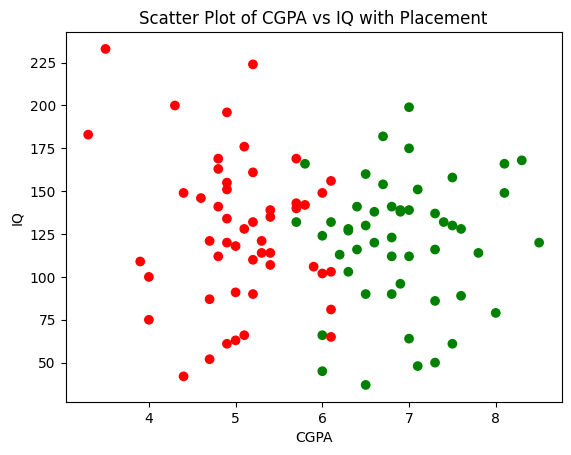

In [55]:
import matplotlib.pyplot as plt

plt.scatter(df['cgpa'], df['iq'], c=df['placement'].map({0: 'red', 1: 'green'}))
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Scatter Plot of CGPA vs IQ with Placement')
#plt.colorbar(label="Placement (0 = Not Placed, 1 = Placed)")
plt.show()



<span style="color: green; font-size: 18px;">Feature Selection</span>


## Extract Input and output columns

In [67]:
X = df.iloc[:,0:2]
print(X.shape)
X

(100, 2)


,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [69]:
y= df.iloc[:,2]
print(y.shape)
y

(100,)


0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_tain, y_test =train_test_split(X,y , test_size = 0.2)

<span style="color: green; font-size: 18px;">Scalling Numbers to -1 to +1</span>


In [84]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
X_train =  scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [83]:
X_train

array([[-1.28245224,  1.17480466],
       [-0.10544062,  0.65555398],
       [ 0.28689658, -0.20120964],
       [-0.89011504, -0.35698484],
       [-0.00735632, -0.53872258],
       [ 1.95432971,  0.65555398],
       [ 0.58114949,  0.78536665],
       [ 0.18881228,  0.08437824],
       [ 0.97348669,  0.70747905],
       [-1.77287375,  1.97964321],
       [-0.10544062, -0.56468511],
       [-1.67478945, -2.12243715],
       [ 0.18881228, -0.53872258],
       [ 1.1696553 , -1.91473687],
       [-1.08628364, -0.85027298],
       [-0.10544062, -2.04454954],
       [ 1.1696553 , -0.20120964],
       [-2.16521096, -0.38294737],
       [-1.38053654, -0.95412312],
       [-0.10544062, -1.49933633],
       [ 0.48306519,  0.36996611],
       [ 0.38498088,  0.94114185],
       [ 0.87540239,  0.39592864],
       [-0.98819934,  1.3565424 ],
       [-0.20352493, -0.46083498],
       [ 1.3658239 ,  0.88921679],
       [ 0.87540239,  1.95368068],
       [-0.30160923,  0.47381624],
       [-1.18436794,